# Avance 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clientes_nyc.csv')
df_clientes_nyc = df.copy()
df = pd.read_csv('restaurantes_nyc.csv')
df_restaurantes_nyc = df.copy()
df = pd.read_csv('clientes.csv')
df_clientes = df.copy()

In [3]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28537 entries, 0 to 28536
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 28537 non-null  int64 
 1   id_persona                 28537 non-null  int64 
 2   edad                       28537 non-null  int64 
 3   genero                     28537 non-null  object
 4   ciudad_residencia          28537 non-null  object
 5   estrato_socioeconomico     28537 non-null  object
 6   frecuencia_visita          28537 non-null  int64 
 7   promedio_gasto_comida      28537 non-null  int64 
 8   ocio                       28537 non-null  object
 9   consume_licor              28537 non-null  object
 10  preferencias_alimenticias  28537 non-null  object
 11  membresia_premium          28537 non-null  object
 12  telefono_contacto          14083 non-null  object
 13  correo_electronico         14183 non-null  object
 14  tipo_d

In [4]:
df_clientes_nyc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4503 non-null   int64 
 1   id_persona                 4503 non-null   int64 
 2   edad                       4503 non-null   int64 
 3   genero                     4503 non-null   object
 4   ciudad_residencia          4503 non-null   object
 5   estrato_socioeconomico     4503 non-null   object
 6   frecuencia_visita          4503 non-null   int64 
 7   promedio_gasto_comida      4503 non-null   int64 
 8   ocio                       4503 non-null   object
 9   consume_licor              4503 non-null   object
 10  preferencias_alimenticias  4503 non-null   object
 11  membresia_premium          4503 non-null   object
 12  telefono_contacto          2195 non-null   object
 13  correo_electronico         2231 non-null   object
 14  tipo_de_

In [5]:
df_restaurantes_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             196 non-null    int64  
 1   id                     196 non-null    object 
 2   alias                  196 non-null    object 
 3   name                   196 non-null    object 
 4   image_url              196 non-null    object 
 5   is_closed              196 non-null    bool   
 6   url                    196 non-null    object 
 7   review_count           196 non-null    int64  
 8   categories             196 non-null    object 
 9   rating                 196 non-null    float64
 10  transactions           196 non-null    object 
 11  price                  196 non-null    object 
 12  phone                  167 non-null    float64
 13  display_phone          167 non-null    object 
 14  distance               196 non-null    float64
 15  coordi

# Cantidad de personas por ciudad

C:\Users\Messi\AppData\Local\Temp\ipykernel_3804\309094205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=personas_ciuadad.values, y=personas_ciuadad.index, palette='viridis')


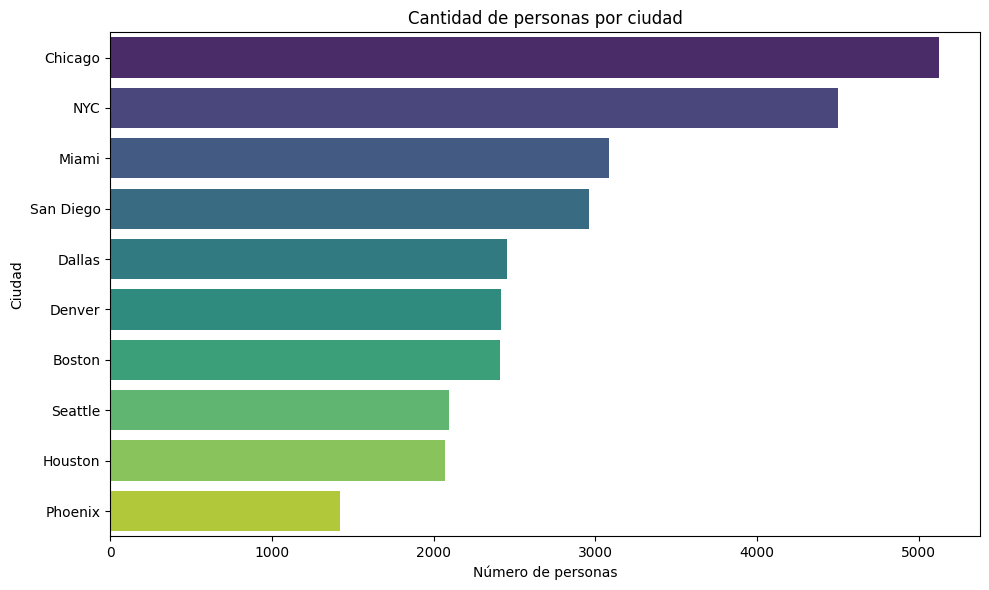

In [6]:
## Este gráfico de barras muestra la cantidad de personas por ciudad en el conjunto de datos de clientes.

personas_ciuadad = df_clientes['ciudad_residencia'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=personas_ciuadad.values, y=personas_ciuadad.index, palette='viridis')
plt.title('Cantidad de personas por ciudad')
plt.xlabel('Número de personas')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

# Distribución de personas por estrato socioeconomico

In [7]:
estrato_socieconomico = df_clientes['estrato_socioeconomico'].value_counts().sort_index()
print (estrato_socieconomico)

estrato_socioeconomico
Alto        9038
Bajo        4698
Medio       9325
Muy Alto    5476
Name: count, dtype: int64


# Ciudades con mayor gasto promedio mensual en restaurantes

C:\Users\Messi\AppData\Local\Temp\ipykernel_3804\570535359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_ciudad.values, y=promedio_ciudad.index, palette='coolwarm')


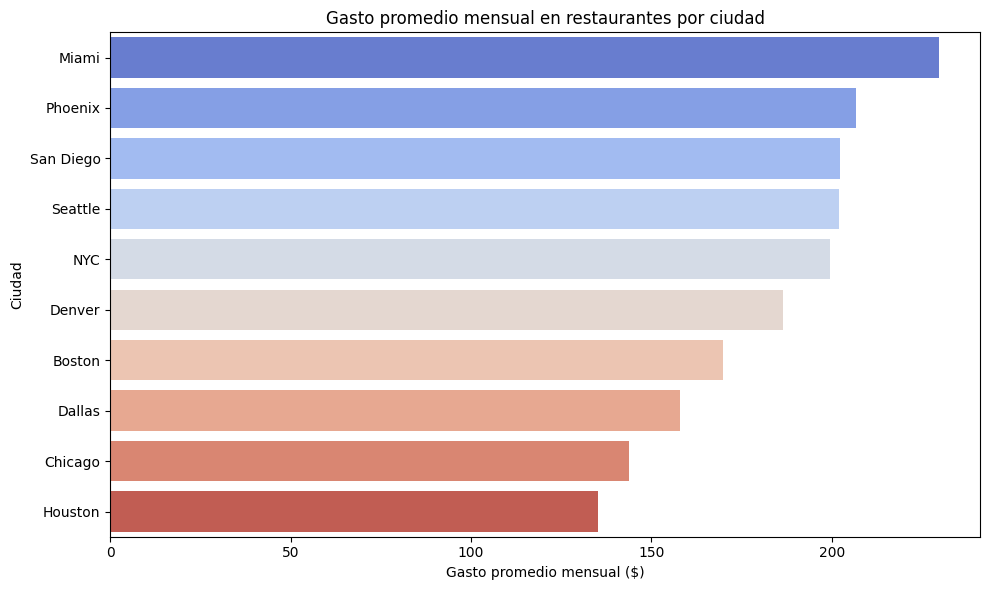

In [8]:
df_clientes['gasto_mensual'] = df_clientes['promedio_gasto_comida'] * df_clientes['frecuencia_visita']
promedio_ciudad = df_clientes.groupby('ciudad_residencia')['gasto_mensual'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_ciudad.values, y=promedio_ciudad.index, palette='coolwarm')
plt.title('Gasto promedio mensual en restaurantes por ciudad')
plt.xlabel('Gasto promedio mensual ($)')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

# Relación entre frecuencia de visita y gasto promedio por comida según estrato socioeconómico

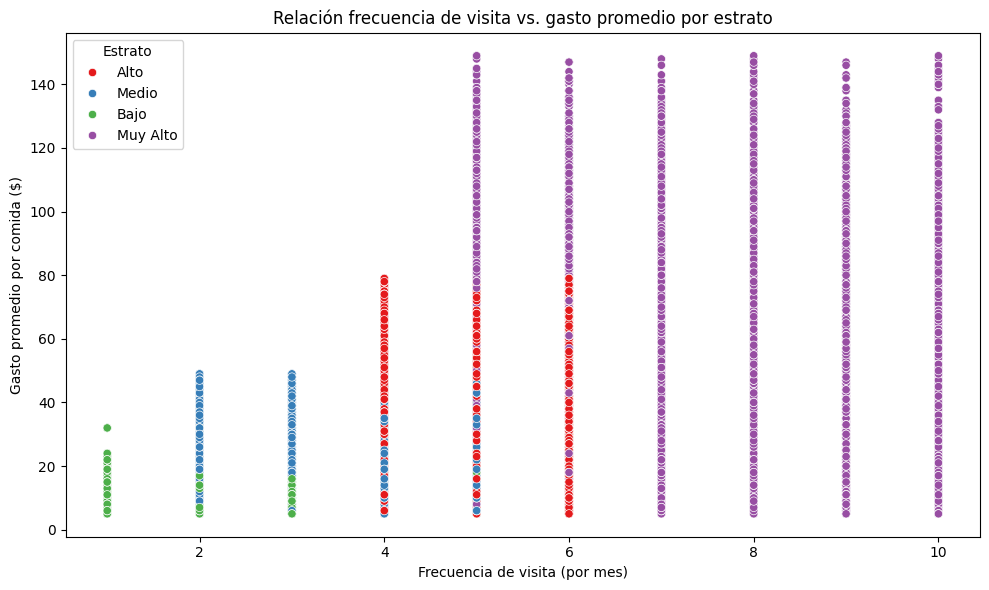

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clientes, x='frecuencia_visita', y='promedio_gasto_comida', hue='estrato_socioeconomico', palette='Set1')
plt.title('Relación frecuencia de visita vs. gasto promedio por estrato')
plt.xlabel('Frecuencia de visita (por mes)')
plt.ylabel('Gasto promedio por comida ($)')
plt.legend(title='Estrato')
plt.tight_layout()
plt.show()

# Relación entre gasto promedio mensual y ingresos mensuales

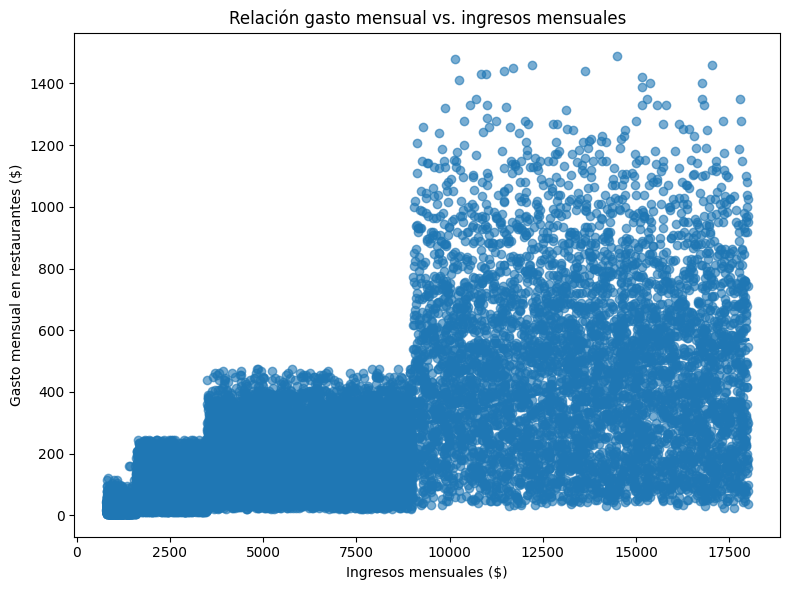

In [11]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_clientes, x='ingresos_mensuales', y='gasto_mensual', scatter_kws={'alpha':0.6})
plt.title('Relación gasto mensual vs. ingresos mensuales')
plt.xlabel('Ingresos mensuales ($)')
plt.ylabel('Gasto mensual en restaurantes ($)')
plt.tight_layout()
plt.show()

# Distribución de preferencias alimenticias en todas las ciudades

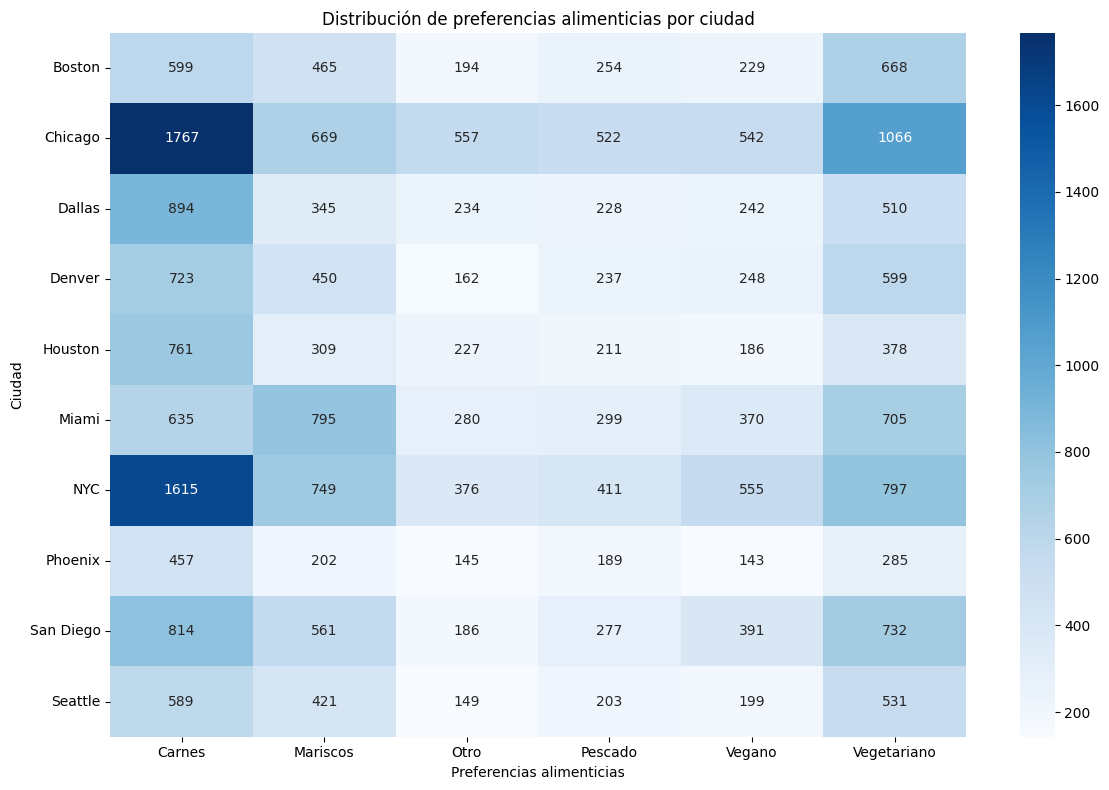

In [12]:
alimentos_ciudad = pd.crosstab(df_clientes['ciudad_residencia'], df_clientes['preferencias_alimenticias'])
plt.figure(figsize=(12, 8))
sns.heatmap(alimentos_ciudad, annot=True, cmap='Blues', fmt='d')
plt.title('Distribución de preferencias alimenticias por ciudad')
plt.xlabel('Preferencias alimenticias')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()

# Perfil de clientes de mayor gasto

In [13]:
gasto_max = df_clientes['gasto_mensual'].quantile(0.9)
riqi_fort = df_clientes[df_clientes['gasto_mensual'] > gasto_max]
print("Preferencias top:", riqi_fort['preferencias_alimenticias'].value_counts())
print("Gasto mensual avg:", riqi_fort['gasto_mensual'].mean())
print("Estrato top:", riqi_fort['estrato_socioeconomico'].value_counts())

Preferencias top: preferencias_alimenticias
Carnes         852
Vegetariano    672
Mariscos       499
Vegano         328
Pescado        275
Otro           217
Name: count, dtype: int64
Gasto mensual avg: 690.946887091101
Estrato top: estrato_socioeconomico
Muy Alto    2751
Alto          92
Name: count, dtype: int64


# Ciudad con más membresías premium

In [14]:
membresia = df_clientes[df_clientes['membresia_premium'] == 'Sí']['ciudad_residencia'].value_counts()
print("Ciudad con más membresías:", membresia.idxmax())
print(membresia)

Ciudad con más membresías: Chicago
ciudad_residencia
Chicago      2213
NYC          1773
Miami        1693
San Diego    1502
Boston       1139
Denver       1068
Seattle      1023
Dallas        992
Houston       808
Phoenix       629
Name: count, dtype: int64


# Relación entre consumo de alcohol y edad

C:\Users\Messi\AppData\Local\Temp\ipykernel_3804\1354864881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clientes, x='consume_licor', y='edad', palette='pastel')


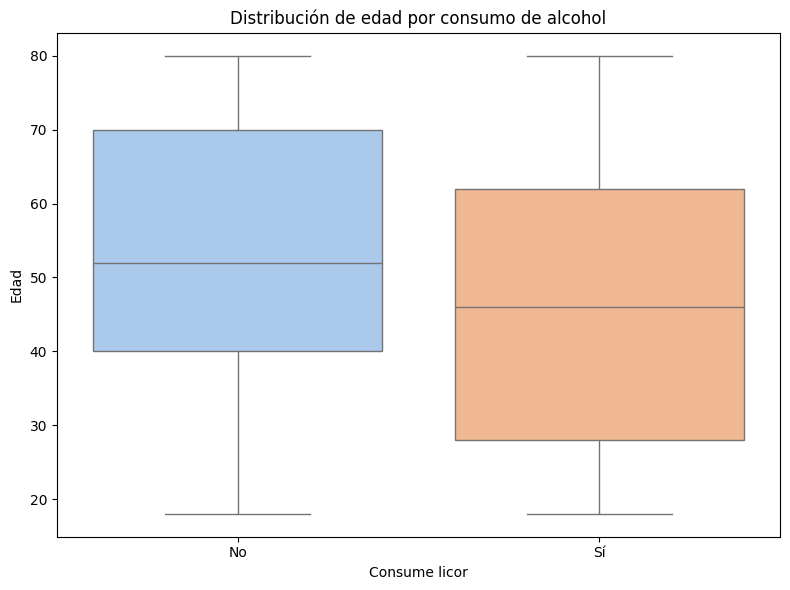

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clientes, x='consume_licor', y='edad', palette='pastel')
plt.title('Distribución de edad por consumo de alcohol')
plt.xlabel('Consume licor')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()